In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [7]:

# Upload Dataset CSV
from google.colab import files
uploaded = files.upload()

Saving retail_raw_reduced.csv to retail_raw_reduced.csv


In [9]:
dataset = pd.read_csv('retail_raw_reduced.csv')

In [10]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [11]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

(0.0, 41.05)

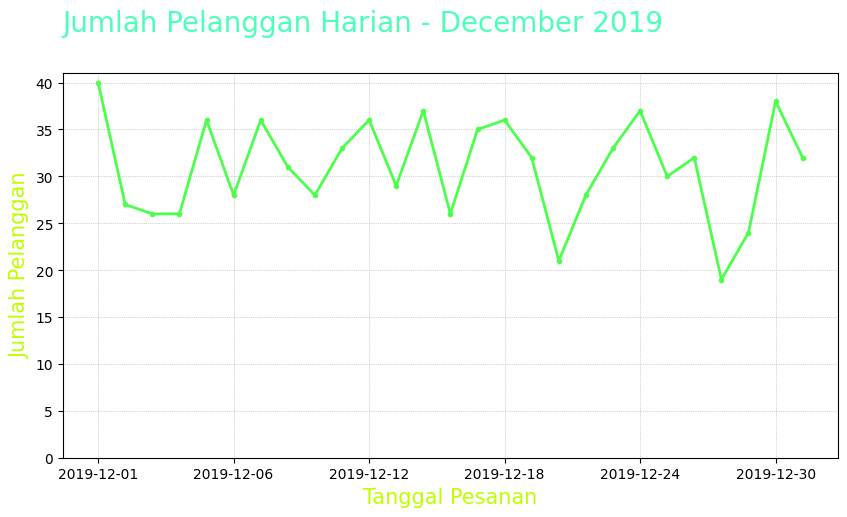

In [18]:
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='#4dff4d', marker='.', linewidth=2)
plt.title('Jumlah Pelanggan Harian - December 2019', loc='left', pad=30, fontsize=20, color='#4dffb8')
plt.xlabel('Tanggal Pesanan', fontsize=15, color='#bfff00')
plt.ylabel('Jumlah Pelanggan', fontsize=15, color='#bfff00')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

In [19]:
#CASE 1
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
# print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


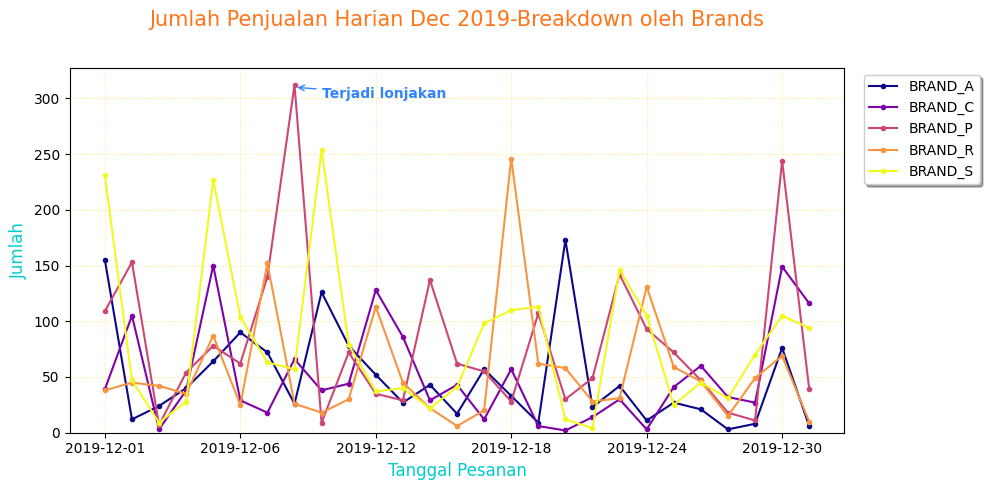

In [34]:
#CASE 2
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Jumlah Penjualan Harian Dec 2019-Breakdown oleh Brands',loc='center',pad=30, fontsize=15, color='#ff751a')
plt.xlabel('Tanggal Pesanan', fontsize = 12, color='#00cccc')
plt.ylabel('Jumlah',fontsize = 12, color='#00cccc')
plt.grid(color='#ffdb4d', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='#3385ff',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='#3385ff'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

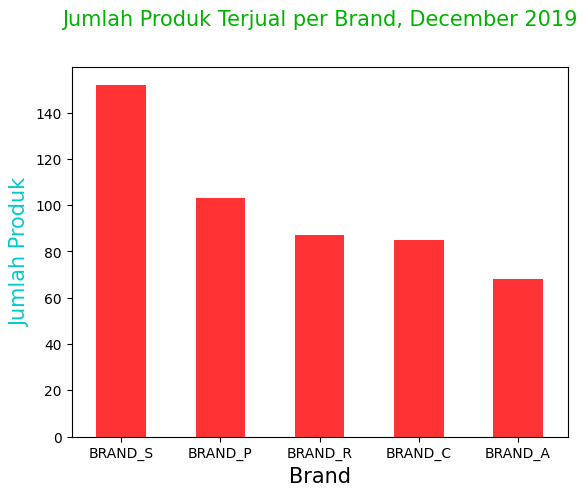

In [30]:
#CASE 3
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='#ff3333')
plt.title('Jumlah Produk Terjual per Brand, December 2019',loc='center',pad=30, fontsize=15, color='#00b300')
plt.xlabel('Brand', fontsize = 15,)
plt.ylabel('Jumlah Produk',fontsize = 15, color='#00cccc')
plt.ylim(ymin=0)
plt.xticks(rotation=0)

### CASE 4

In [35]:
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

In [36]:
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

In [37]:
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

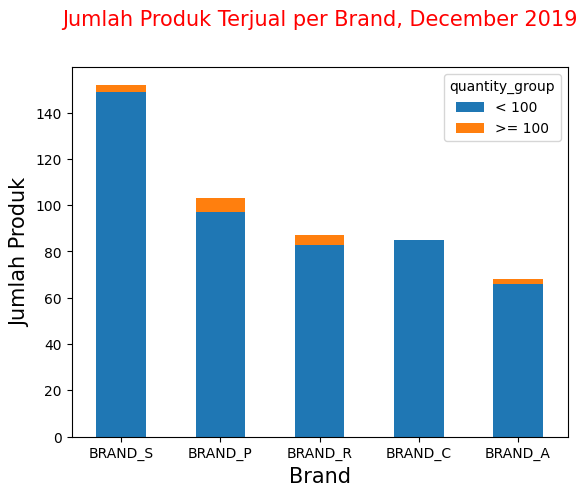

In [51]:
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah Produk Terjual per Brand, December 2019',loc='center',pad=30, fontsize=15, color='red')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Jumlah Produk',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

(0.0, 2000000.0)

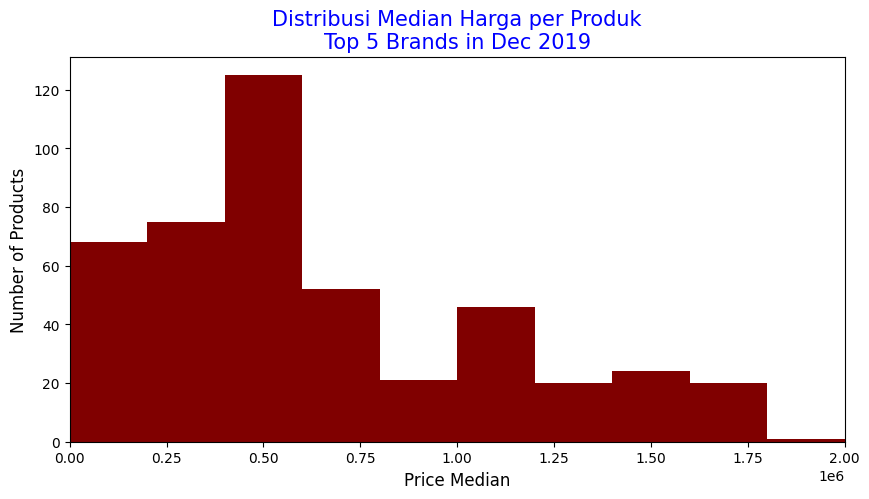

In [60]:
#CASE 5
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='#800000')
plt.title('Distribusi Median Harga per Produk\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Median Harga', fontsize = 12)
plt.ylabel('Jumlah Produk',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)

([<matplotlib.axis.YTick at 0x7ff5c11dda80>,
 [Text(0, 0.0, '0'),
  Text(0, 25000000.0, '25'),
  Text(0, 50000000.0, '50'),
  Text(0, 75000000.0, '75'),
  Text(0, 100000000.0, '100'),
  Text(0, 125000000.0, '125'),
  Text(0, 150000000.0, '150'),
  Text(0, 175000000.0, '175'),
  Text(0, 200000000.0, '200')])

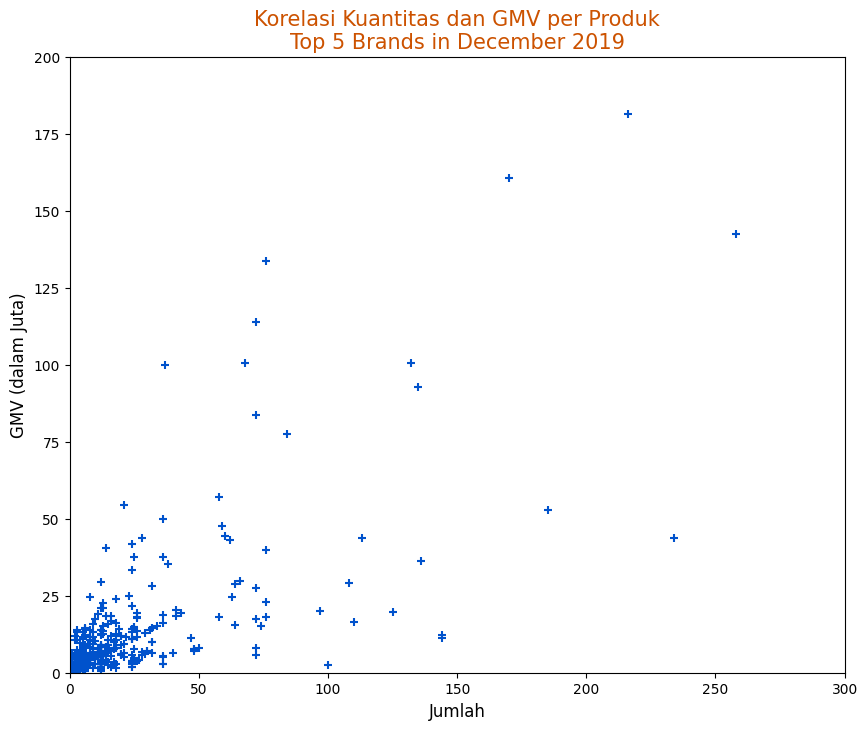

In [61]:
#CASE 6A
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='#0052cc')
plt.title('Korelasi Kuantitas dan GMV per Produk\nTop 5 Brands in December 2019',fontsize=15, color='#cc5200')
plt.xlabel('Jumlah', fontsize = 12)
plt.ylabel('GMV (dalam Juta)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

(0.0, 250.0)

<Figure size 640x480 with 0 Axes>

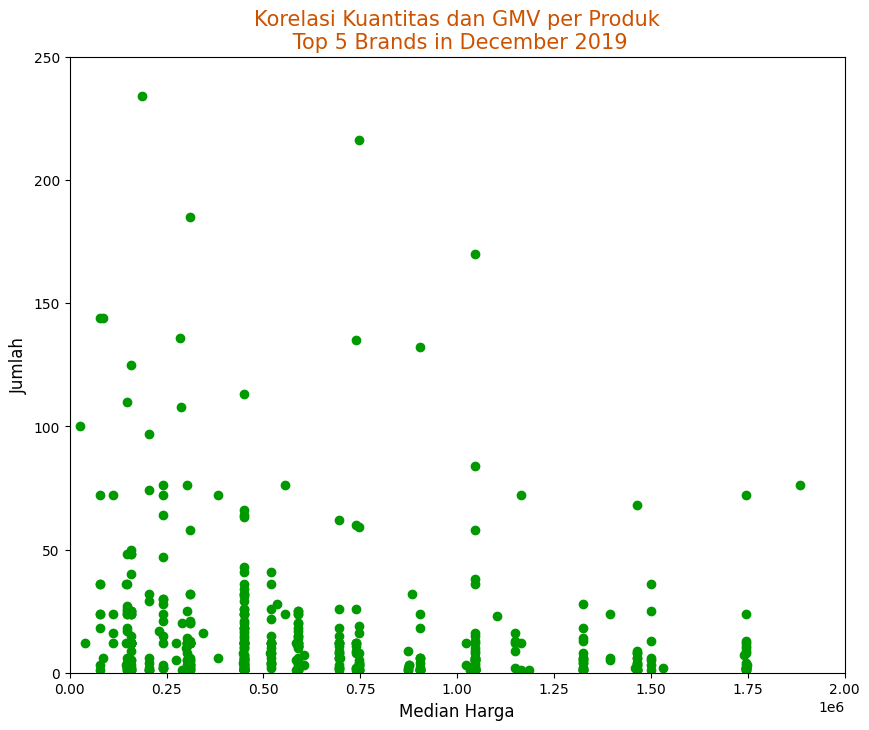

In [62]:
#CASE 6B
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='#009900')
plt.title('Korelasi Kuantitas dan GMV per Produk\n Top 5 Brands in December 2019',fontsize=15, color='#cc5200')
plt.xlabel('Median Harga', fontsize = 12)
plt.ylabel('Jumlah',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)